In [1]:
# Importar as libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lendo a base de dados
Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESTUDO/Prostate_Cancer.csv', sep=',')
Dados.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
# Vamos traduzir as colunas para melhor entedimento
Dados.rename( columns={
    'diagnosis_result' : 'Diagnóstico resultado',
    'radius' : 'Raio',
    'texture' : 'Textura',
    'perimeter' : 'Perímetro',
    'area' : 'Área',
    'smoothness' : 'Suavidade' ,
    'compactness' : 'Compacidade',
    'symmetry' : 'Simetria',
    'fractal_dimension' : 'Dimensão do fragmento'
}, inplace=True )

Dados.head()

,id,Diagnóstico resultado,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão do fragmento
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
# Analisar algumas estatísticas
Dados.describe()

,id,Raio,Textura,Perímetro,Área,Suavidade,Compacidade,Simetria,Dimensão do fragmento
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [6]:
# Ajustando a nomenclatura do diagnostico
Dados['Diagnóstico resultado'] = Dados['Diagnóstico resultado'].replace('M', 'Maligno')
Dados['Diagnóstico resultado'] = Dados['Diagnóstico resultado'].replace('B', 'Benigno')

In [7]:
# Vamos retirar a coluna 'ID'
Dados.drop(['id'], axis=1, inplace=True)

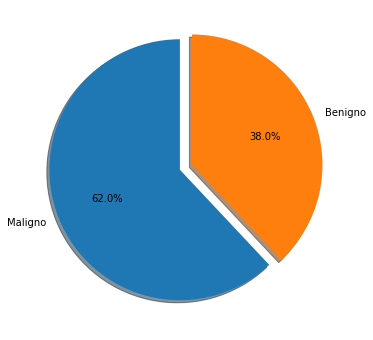

In [8]:
# Vamos plotar a divisão dos diagnosticos

# Calculando os valores
Valores = Dados['Diagnóstico resultado'].value_counts()
# Filtrando os labels
Labels = [ Valores.index.tolist() ]

plt.figure( figsize=(8,6) )
plt.pie( Valores, # valores do gráficos
        labels=Labels[0], # Labels laterais
        shadow=True, # Sombra nas pizzas
        explode=(0.0, 0.1), # afastamento das pizzas
        startangle=90, # Ajuste do anglo
        autopct='%1.1f%%'); # Incluindo os valores no gráfico 

In [9]:
# Ajustando a variável do diagnostico para numerica

# Importando a função do LabelEncoder
from sklearn import preprocessing

# Atribuindo a função
Ajuste_Variavel = preprocessing.LabelEncoder()

Dados['Diagnóstico resultado'] = Ajuste_Variavel.fit_transform( Dados['Diagnóstico resultado'] )

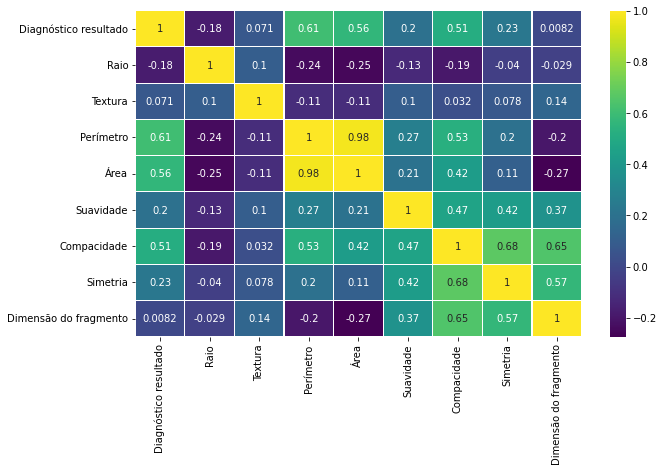

In [10]:
# --- Analisando as correlações em uma plotagem

# Calculando a correlação entre os dados usando o Numpy
Correlacao = Dados.corr()

# Definindo Tamanho do Gráfico
plt.figure(figsize=(10,6)) 

# Fazendo o plot do gráfico
sns.heatmap(Correlacao, linewidths=.1, cmap='viridis', annot=True);

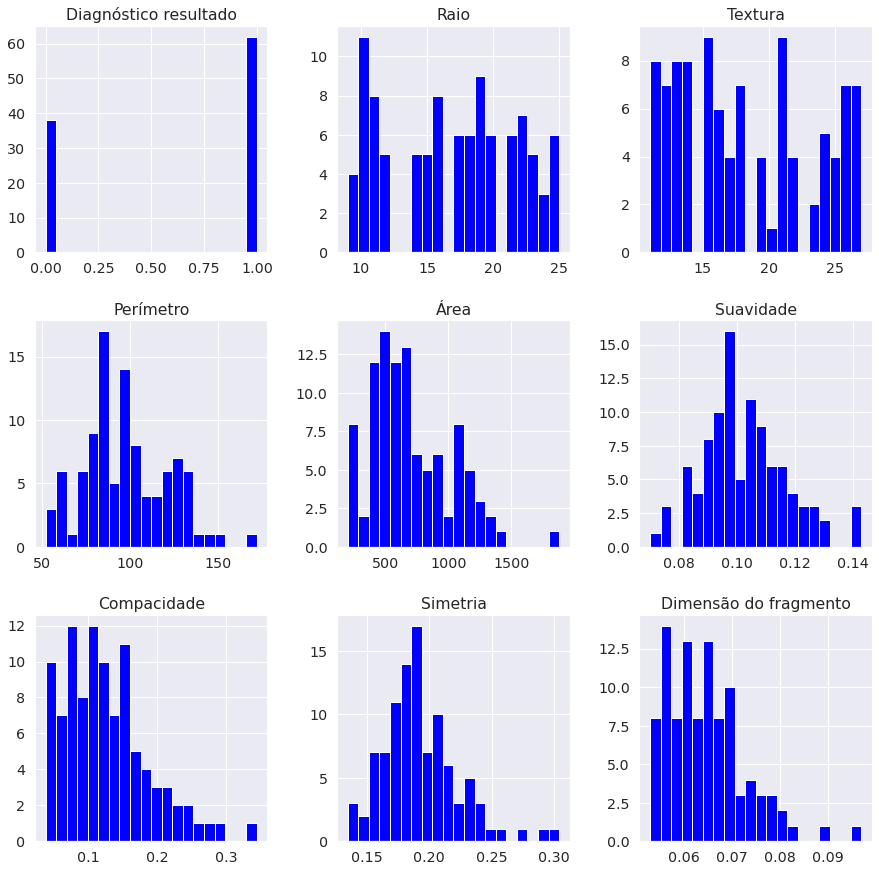

In [11]:
# --- Plotando todos os dados

# Definindo parametros de tamanho dos gráficos
sns.set( font_scale=1.3, rc={'figure.figsize':(15, 15)} )

# Plotando todos gráficos como histogram
# ajuste no tamanho da barra e cor
ax = Dados.hist( bins=20, color='blue' )

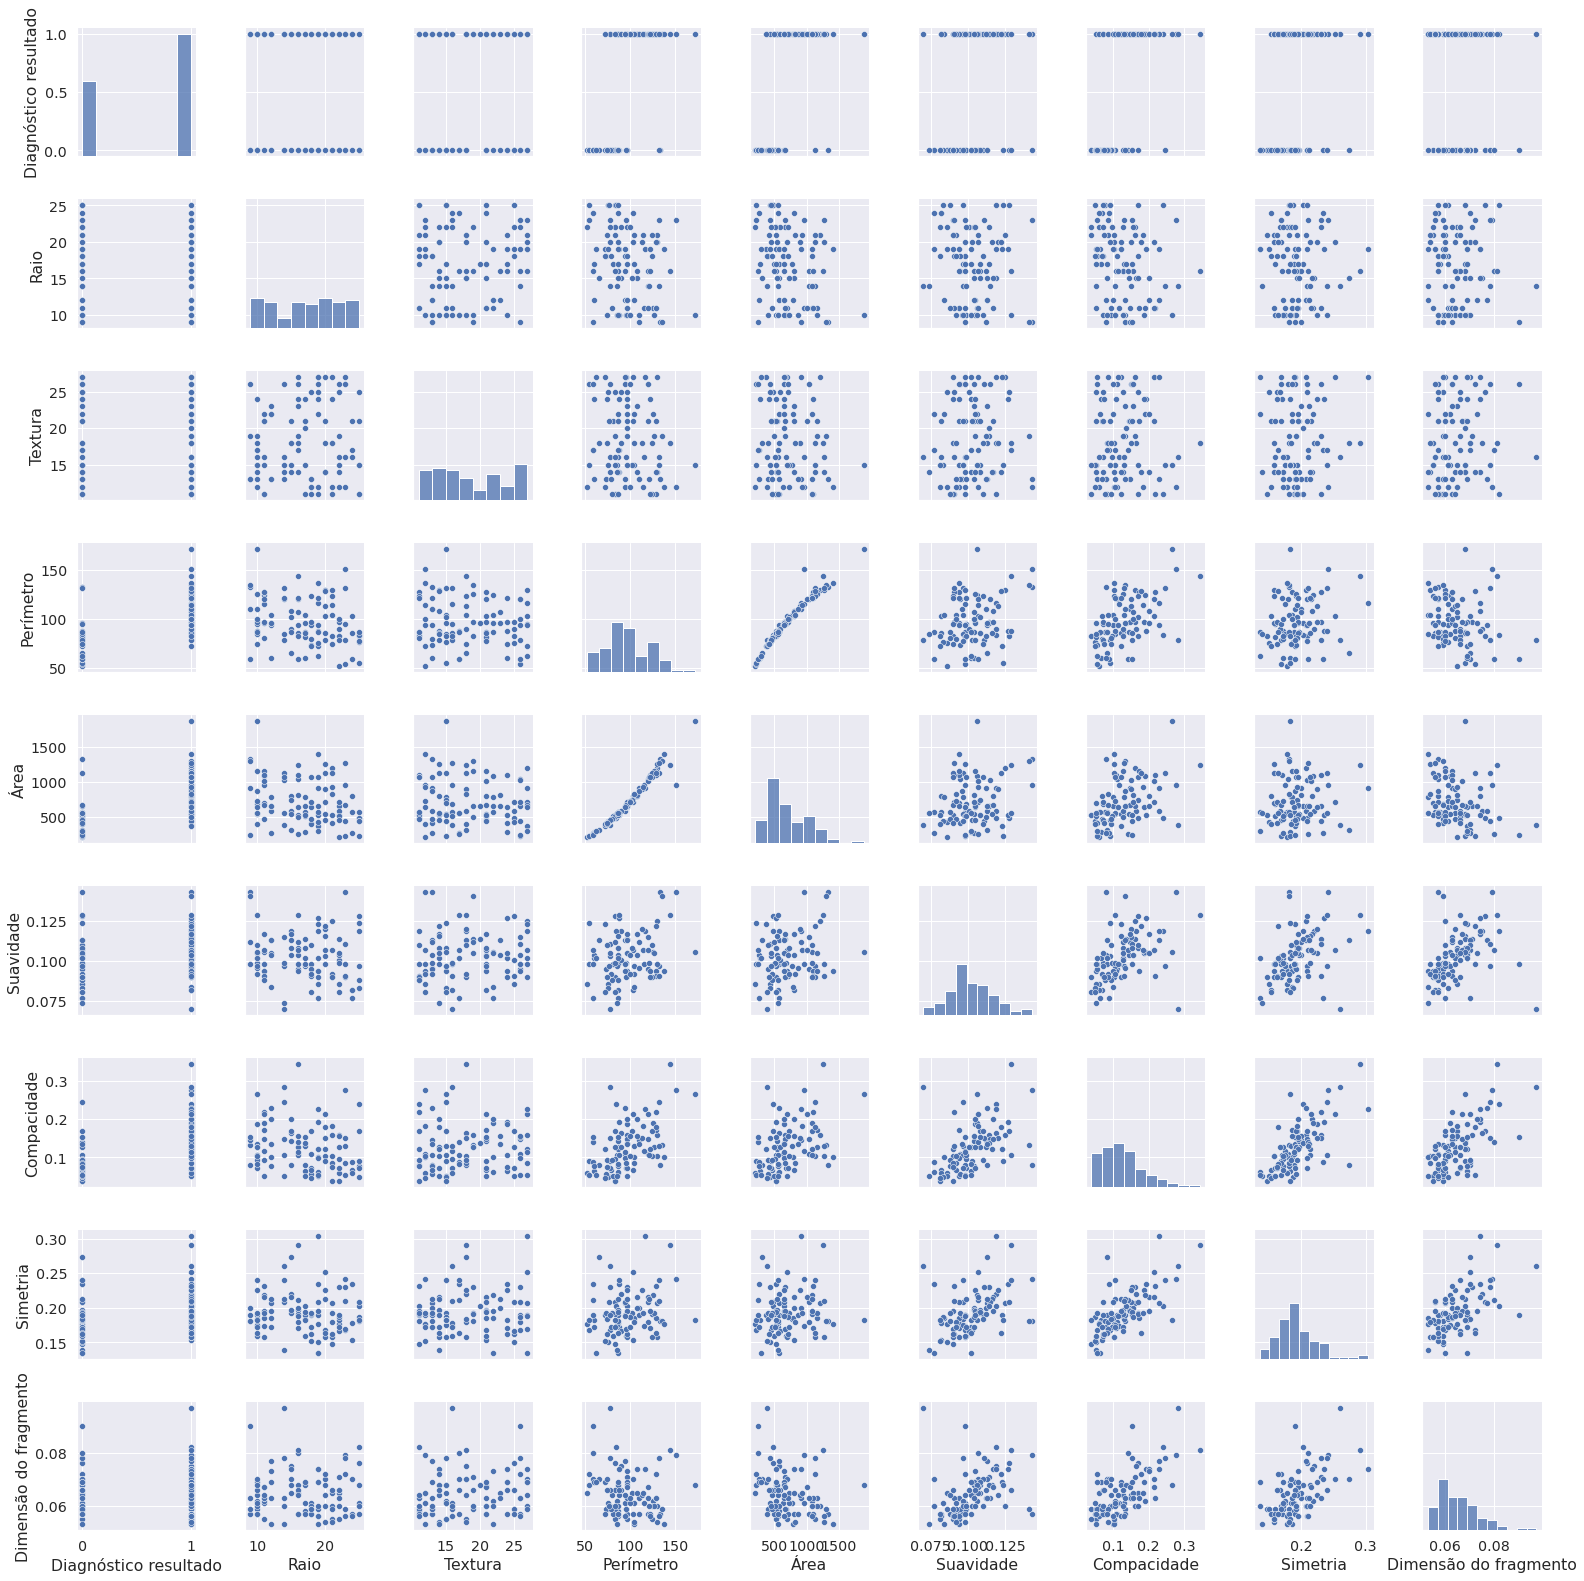

In [12]:
# Plot geral
sns.pairplot(Dados);

In [13]:
# Separando a base de dados
Caracteristica = Dados.iloc[:,1:].values
Previsor = Dados.iloc[:,0:1].values

# Importando a função para separar os dados de Treino e Teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split( Caracteristica, 
                                                          Previsor, 
                                                        test_size=0.20,
                                                        random_state=10)

print('Dados de Treinamento:', len(x_treino) )
print('Dados de Teste:', len(x_teste) )

Dados de Treinamento: 80
Dados de Teste: 20


In [14]:
# Treinamento do Modelo

# Função do Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Função do Naive Bayes
Funcao_NB = GaussianNB()

# Fitando o modelo
Funcao_NB.fit( x_treino, y_treino )

# Calculando o scoore do modelo
print('Score do Modelo:', Funcao_NB.score( x_treino, y_treino ) )

Score do Modelo: 0.8125


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


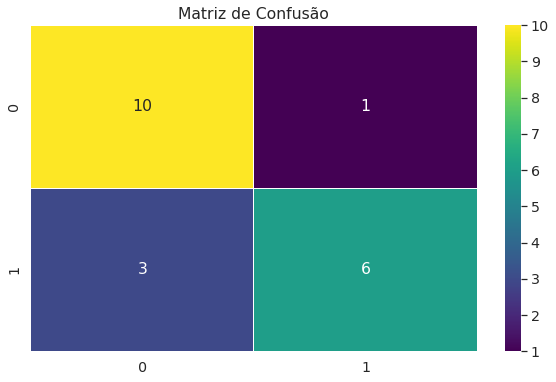

In [15]:
# Previsoes
Previsoes = Funcao_NB.predict( x_teste )

from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix( y_teste, Previsoes )

# Definindo Tamanho do Gráfico
plt.figure(figsize=(10,6)) 

# Fazendo o plot do gráfico
sns.heatmap(Matriz, linewidths=.1, cmap='viridis', annot=True)
plt.title('Matriz de Confusão');

In [18]:
# Analisar o Report
from sklearn.metrics import classification_report
print( classification_report( y_teste, Previsoes ) )

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20

